# CS613 Final Project
## Group 9: Stroke Prediction Model
## Authors: Danny Li - Tien Nguyen - Emily Wang

# Part1. Preprocessing

In [1]:
# Import libraries
import numpy as np
import math
import csv
import pandas as pd
import random
from collections import defaultdict
from matplotlib import pyplot as plt

In [44]:
def count_branch(var, y):
    br = []
    for i in range(len(var)):
        if var.ndim ==2:
            num = var[0,0]
            #print(num)
        else:
            num = var[i]
        if num not in br:
            br.append(num)
    #print(br)
    class_num = []
    for i in range(len(y)):
        if y[i] not in class_num:
            class_num.append(y[i])
        
        d_br = defaultdict()
    for item in br:
        d_br[item] = dict.fromkeys(class_num, 0)
    for ele in range(len(y)):
        for i in br:
            for j in class_num:
                if var[ele]==i and y[ele] == j:
                    d_br[i][j]+=1
    return d_br

def entropy_ind(num, total):
    """
    This function return the entropy value given the ratio of the attribute
    """
    if num ==0:
        return 0
    else:
        return (-num/total)*np.log2(num/total)

# This function calculate entropy of a branch
#input: a dict
def entropy_br(d_br):
    br_en = defaultdict()
    keys = list(d_br.keys())
    total = np.sum(list(d_br.values()))
    for item in keys:
        br_en[item] = 0
    for i in range(len(keys)):
        br_en[keys[i]] += entropy_ind(d_br[keys[i]],total)
    en= np.sum(list(br_en.values()))
    return [en, total]

# This function calculate the entropy of a feature
#entropy and count could be an array
def entropy_var(entropy, count):
    en_var = 0
    total = np.sum(count)
    if total ==0:
        return entropy
    for i in range(len(entropy)):
        en_var += (count[i]/total)*entropy[i]
    return en_var

# This function return the feature that has min entropy
def top12features(dataset, header):
    en_all = []
    en_dict = defaultdict()
    for i in range(dataset.shape[1]-1):
        en_ls = []
        count_ls = []
        d_br = count_branch(dataset[:,i],dataset[:,-1])
        for key in d_br.keys():
            ind_en, ind_count = entropy_br(d_br[key])
            en_ls.append(ind_en)
            count_ls.append(ind_count)
        en_avg = entropy_var(np.array(en_ls), np.array(count_ls))
        en_dict[i]=en_avg
    en_sorted = sorted(en_dict.items(), key=lambda item:item[1])
    top12 = en_sorted[:12]
    ls_index = sorted([item[0] for item in top12])
    d = defaultdict()
    for item in ls_index:
        d[header[item]]=dataset[:,item]
    d[header[-1]] = dataset[:, -1]
    df = pd.DataFrame(data=d)
    return df

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (31) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


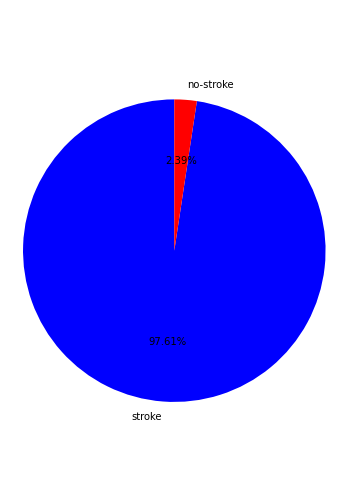

In [45]:
s_data = pd.read_csv('data.csv')
df = s_data.dropna(axis='columns')
f_index = list(range(2,20))
f_index.append(52)
df_initial = s_data.iloc[:,f_index]
df_initial = df_initial.dropna()
df_initial=df_initial.drop(df_initial[df_initial['RDEF1']=='C'].index)
df_initial=df_initial.drop(df_initial[df_initial['RDEF2']=='C'].index)
df_initial=df_initial.drop(df_initial[df_initial['RDEF3']=='C'].index)
df_initial=df_initial.drop(df_initial[df_initial['RDEF4']=='C'].index)
df_initial=df_initial.drop(df_initial[df_initial['RDEF5']=='C'].index)
df_initial=df_initial.drop(df_initial[df_initial['RDEF6']=='C'].index)
df_initial=df_initial.drop(df_initial[df_initial['RDEF7']=='C'].index)
df_initial=df_initial.drop(df_initial[df_initial['RDEF8']=='C'].index)
df_initial=df_initial.drop(df_initial[df_initial['DNOSTRK']=='U'].index)

df_initial.SEX = df_initial.SEX.replace({'M':0,'F':1}).astype(np.uint8)
df_initial = df_initial.replace({'Y':1,'N':0})
df_initial.RCONSC = df_initial.RCONSC.replace({'F':0,'D':1, 'U':2}).astype(np.uint8)
df_initial['DNOSTRK'] = df_initial['DNOSTRK'].replace([0,1],[1,0])

plt.rcParams['font.sans-serif']=['SimHei'] 
plt.figure(figsize=(6,9))
labels = [u'stroke',u'no-stroke'] 
sizes = [12767, 312]
colors = ['blue','red'] 
explode = (0,0)
patches,text1,text2 = plt.pie(sizes,
                      explode=explode,
                      labels=labels,
                      colors=colors,
                      autopct = '%3.2f%%', 
                      shadow = False, 
                      startangle =90, 
                      pctdistance = 0.6)
plt.axis('equal')
plt.show()

In [46]:
paper_features = df_initial[['AGE','SEX','RSLEEP','RATRIAL', 'RVISINF', 'RDEF1', 'RDEF2', 'RDEF3', 'RDEF4', 'RDEF5', 'RDEF6', 'RDEF7','DNOSTRK']]
top12_features = top12features(np.array(df_initial), list(df_initial.columns))

p_nstrk = paper_features[paper_features['DNOSTRK']==0]
p_strk = (paper_features[paper_features['DNOSTRK']==1]).sample(n = len(p_nstrk))
p_balanced_data = pd.concat([p_strk, p_nstrk])

t_nstrk = top12_features[top12_features['DNOSTRK']==0]
t_strk = (top12_features[top12_features['DNOSTRK']==1]).sample(n = len(t_nstrk))
t_balanced_data = pd.concat([t_strk, t_nstrk])

df_initial.to_csv('18features.csv', header = True, sep = ",", index = False)
paper_features.to_csv('12paper_features.csv', header = True, sep = ",", index = False)
top12_features.to_csv('12top_features.csv', header = True, sep = ",", index = False)
p_balanced_data.to_csv('12paper_features_balanced.csv', header = True, sep = ",", index = False)
t_balanced_data.to_csv('12top_features_balanced.csv', header = True, sep = ",", index = False)

# Part 2. Machine Learning Classifiers

## 2.1. Logistic Regression

In [65]:
def cal_pr(th, y_hat_val, y_val): #thread
    # count TP, FP, FN
    TP = 0
    FP = 0
    TN = 0
    FN = 0
    
    for i in range(len(y_hat_val)):
        if y_hat_val[i] >= th and y_val[i] == 1:
            TP += 1
        elif y_hat_val[i][0] >= th and y_val[i][0] == 0:
            FP += 1
        elif y_hat_val[i][0] < th and y_val[i][0] == 1:
            FN += 1
        else:
            TN +=1
    if TP == 0:
        return 0,0
    pre = TP/(TP+FP)
    rec = TP/(TP+FN)
    f_measure = 2*pre*rec/(pre+rec)
    accuracy = (TP + TN)/(TP+TN+FP+FN)
    return pre, rec, f_measure, accuracy

def Logistic_Regression(filename):
    data= pd.read_csv(filename)
    spam_rand = data.sample(frac=1, random_state=0)

    num_train = math.ceil(((2/3)*len(spam_rand)))
    num_valid = len(spam_rand)-num_train

    train = spam_rand.iloc[0:num_train,:] 
    val = spam_rand.iloc[num_train:,:]

    X_train = np.ones(num_train).reshape(-1,1)
    # zscore the training data
    for j in range(len(train.columns)-1): #of features
        vector = train.iloc[:,j].to_numpy()
        mean = np.mean(vector)
        std = np.std(vector,ddof=1)
        stand = (vector-mean)/std
        X_train = np.append(X_train,stand.reshape(-1,1),axis=1)

    # add bias feature   validation part
    X_val = np.ones(num_valid).reshape(-1,1) # // validation

    # zscore the validation data
    for j in range(len(train.columns)-1):
        vector_val = val.iloc[:,j].to_numpy()
        vector = train.iloc[:,j].to_numpy()
        mean = np.mean(vector)
        std = np.std(vector,ddof=1)
        stand = (vector_val-mean)/std
        X_val = np.append(X_val,stand.reshape(-1,1),axis=1)

    np.random.seed(0)
    omega = np.random.uniform(-0.01,0.01,X_train.shape[1]).reshape(-1,1)

    y_hat = 1 / (1 + np.exp(-X_train.dot(omega)))
    y_train = train.iloc[:,-1].to_numpy().reshape(-1,1)
    j = np.mean(y_train*(np.log(y_hat))+(1-y_train)*(np.log(1-y_hat)))
    y_val = val.iloc[:,-1].to_numpy().reshape(-1,1)
    y_hat_val = 1 / (1 + np.exp(-X_val.dot(omega)))
    j_val = np.mean(y_val*(np.log(y_hat_val))+(1-y_val)*(np.log(1-y_hat_val)))

    # terminate until meet criteria
    count = 0
    value_change = 1

    list1 = [j]
    list2 = [j_val]

    while count <= 1000 and value_change >= 2**-23: # number of epoch
        #print(count)
        omega  = omega + (10**(-4))*(X_train.T.dot(y_train-y_hat))
        y_hat = 1 / (1 + np.exp(-X_train.dot(omega)))
        for i in range(len(y_hat)):
            if y_hat[i][0] == 1:
                y_hat[i][0] = y_hat[i][0] - 0.01
            if y_hat[i][0] == 0:
                y_hat[i][0] = y_hat[i][0] + 0.01
        j_new = np.mean(y_train*(np.log(y_hat))+(1-y_train)*(np.log(1-y_hat)))
        value_change = np.abs(j_new-j)

        y_hat_val = 1 / (1 + np.exp(-X_val.dot(omega)))
        for k in range(len(y_hat_val)):
            if y_hat_val[k][0] == 1:
                y_hat_val[k][0] = y_hat_val[k][0] - 0.01
            if y_hat_val[k][0] == 0:
                y_hat_val[k][0] = y_hat_val[k][0] + 0.01
        j_val_new = np.mean(y_val*(np.log(y_hat_val))+(1-y_val)*(np.log(1-y_hat_val)))

        list1.append(j_new)
        list2.append(j_val_new)
        j = j_new
        count += 1

    pre_train, recall_train, f_train, accuracy_train = cal_pr(0.5,y_hat, y_train )
    print("Training")
    print("Precision\tRecall\t\tf-Measure\tAccuracy")
    print("{:.3f}\t\t{:.3f}\t\t{:.3f}\t\t{:.3f}".format(pre_train, recall_train, f_train, accuracy_train))

    pre_valid, recall_valid, f_valid, accuracy_valid = cal_pr(0.5,y_hat_val, y_val )
    print("Validation")
    print("Precision\tRecall\t\tf-Measure\tAccuracy")
    print("{:.3f}\t\t{:.3f}\t\t{:.3f}\t\t{:.3f}".format(pre_valid, recall_valid, f_valid, accuracy_valid))

In [66]:
# Logistic Regression for 18-Features dataset
Logistic_Regression('18features.csv')

Training
Precision	Recall		f-Measure	Accuracy
0.976		1.000		0.988		0.976
Validation
Precision	Recall		f-Measure	Accuracy
0.977		1.000		0.988		0.977


In [67]:
# Naive Bayes for 12-paper-Features dataset
Logistic_Regression('12paper_features.csv')

Training
Precision	Recall		f-Measure	Accuracy
0.976		1.000		0.988		0.976
Validation
Precision	Recall		f-Measure	Accuracy
0.977		1.000		0.988		0.977


In [68]:
# Logistic Regression for 12-top-Features dataset
Logistic_Regression('12top_features.csv')

Training
Precision	Recall		f-Measure	Accuracy
0.976		1.000		0.988		0.976
Validation
Precision	Recall		f-Measure	Accuracy
0.977		1.000		0.988		0.977


In [69]:
# Logistic Regression for 12-paper-Features balanced dataset
Logistic_Regression('12paper_features_balanced.csv')

Training
Precision	Recall		f-Measure	Accuracy
0.692		0.594		0.639		0.683
Validation
Precision	Recall		f-Measure	Accuracy
0.697		0.600		0.645		0.635


In [70]:
# Logistic Regression for 12-top-Features balanced dataset
Logistic_Regression('12top_features_balanced.csv')

Training
Precision	Recall		f-Measure	Accuracy
0.709		0.619		0.661		0.700
Validation
Precision	Recall		f-Measure	Accuracy
0.683		0.487		0.569		0.591


## 2.2. Naive Bayes

In [36]:
# Function to z_score the training dataset 
def zscore_train(dataset):
    zx_train = (dataset - dataset.mean(axis = 0))/np.std(dataset,axis = 0,ddof = 1)
    return zx_train
# Function to z-score the validation dataset using the mean and standard deviation of the coressponding training dataset
def zscore_valid(valid_set, train_set):
    zx_valid = (valid_set - train_set.mean(axis = 0))/np.std(train_set,axis = 0, ddof =1)
    return zx_valid

# Function to count for output true positive (TP), true negative (TN), false positive (FP), false negative (FN)
def confMatrixPara(pred_y, y):
    TP = 0
    TN = 0
    FP = 0
    FN = 0
    for i in range(len(pred_y)):
        if pred_y[i] == y[i] ==1:
            TP +=1
        elif pred_y[i] == y[i] ==0:
            TN +=1
        elif (pred_y[i] == 0) and (y[i] ==1):
            FN +=1
        else:
            FP +=1
    return TP, TN, FP, FN

def count_class(array_y):
    ls = []
    for i in array_y:
        if i not in ls:
            ls.append(i)
    return ls
        
    
# Function to calculate for the required statistics
def statistics_result(TP, TN, FP, FN, array):
    precision =TP/(TP+FP)
    recall = TP/(TP +FN) 
    f_measure = 2*precision*recall/(precision+recall)
    accuracy = (1/len(array))*(TP+TN)
    return precision, recall, f_measure, accuracy

def pdf(x, mean, std):
    return np.exp(-0.5*((x-mean)/std)**2)/(std*np.sqrt(2*np.pi))

def probability(x_valid, prior, mean_ls, std_ls):
    prob = np.log(prior)
    for i in range(len(mean_ls)):
        pdf_i = pdf(x_valid[i],mean_ls[i], std_ls[i])
        if pdf_i ==0:
            return 0
        else:
            prob = prob+ np.log(pdf_i)
    return np.exp(prob)

# Function to apply threshold for classification
def apply_threshold(array, threshold):
    array2 = np.zeros((array.shape))
    for i in range(len(array)):
        if array[i] >= threshold:
            array2[i] = 1
        else:
            continue
    return array2
def Naive_Bayes(filename):
    data = pd.read_csv(filename, sep = ',')
    data_list = data.values.tolist()

    # Randomize the data
    np.random.seed(0)
    np.random.shuffle(data_list)
    data_rand = np.array(data_list)


    # Separate features data and rename to x and y
    y_data = np.array(data_rand[:, -1])
    x_data = np.array(data_rand[:, :-1])

    # Selecte the first 2/3 (round up) of the data for training and the remaining for validation
    num_train = math.ceil(((2/3)*len(data_rand)))
    y_train = y_data[:num_train]
    x_train = x_data[:num_train,:]
    y_valid = y_data[num_train:]
    x_valid = x_data[num_train:,:]

    # Zcores the features training data
    zx_train = zscore_train(x_train)
    zx_valid = zscore_valid(x_valid, x_train)

    class_set = count_class(y_train)
    data_set = []
    prior_set = []
    mean_set= []
    std_set = []
    for i in class_set:
        array = zx_train[y_train==i]
        data_set.append(array)
        prior_= len(array)/len(zx_train)
        prior_set.append(prior_)
        mean_ =np.array([np.mean(array[:, j]) for j in range(array.shape[1])])
        std_ = np.array([np.std(array[:,j],ddof = 1) for j in range(array.shape[1])])
        mean_ = mean_[std_ >= 1e-4]
        std_ = std_[std_ >= 1e-4]
        mean_set.append(mean_)
        std_set.append(std_)

    training =[]
    for i in range(len(zx_train)):
        p_set = []
        for j in range(len(class_set)):
            p_ = probability(zx_train[i], prior_set[j], mean_set[j], std_set[j])
            p_set.append(p_)
        pred_train_y =class_set[p_set.index(max(p_set))]
        training.append(pred_train_y)

    TP_train, TN_train, FP_train, FN_train = confMatrixPara(training, y_train)
    pre_train, recall_train, f_train, accuracy_train = statistics_result(TP_train, TN_train, FP_train, FN_train, y_train)
    print("Training")
    print("Precision\tRecall\t\tf-Measure\tAccuracy")
    print("{:.3f}\t\t{:.3f}\t\t{:.3f}\t\t{:.3f}".format(pre_train, recall_train, f_train, accuracy_train))

    prediction =[]
    for i in range(len(zx_valid)):
        p_set = []
        for j in range(len(class_set)):
            p_ = probability(zx_valid[i], prior_set[j], mean_set[j], std_set[j])
            p_set.append(p_)
        pred_y =class_set[p_set.index(max(p_set))]
        prediction.append(pred_y)

    TP_valid, TN_valid, FP_valid, FN_valid = confMatrixPara(prediction, y_valid)
    pre_valid, recall_valid, f_valid, accuracy_valid = statistics_result(TP_valid, TN_valid, FP_valid, FN_valid, y_valid)
    print("Validation")
    print("Precision\tRecall\t\tf-Measure\tAccuracy")
    print("{:.3f}\t\t{:.3f}\t\t{:.3f}\t\t{:.3f}".format(pre_valid, recall_valid, f_valid, accuracy_valid))

In [37]:
# Naive Bayes for 18-Features dataset
Naive_Bayes('18features.csv')

Training
Precision	Recall		f-Measure	Accuracy
0.980		0.943		0.961		0.925
Validation
Precision	Recall		f-Measure	Accuracy
0.980		0.940		0.960		0.923


In [40]:
# Naive Bayes for 12-paper-features dataset
Naive_Bayes('12paper_features.csv')

Training
Precision	Recall		f-Measure	Accuracy
0.979		0.963		0.971		0.943
Validation
Precision	Recall		f-Measure	Accuracy
0.979		0.960		0.969		0.941


In [41]:
# Naive Bayes for 12-top-features dataset
Naive_Bayes('12top_features.csv')

Training
Precision	Recall		f-Measure	Accuracy
0.979		0.951		0.965		0.932
Validation
Precision	Recall		f-Measure	Accuracy
0.980		0.946		0.962		0.928


In [47]:
# Naive Bayes for 12-top-features dataset
Naive_Bayes('12paper_features_balanced.csv')

Training
Precision	Recall		f-Measure	Accuracy
0.722		0.528		0.610		0.680
Validation
Precision	Recall		f-Measure	Accuracy
0.730		0.470		0.571		0.611


In [48]:
# Naive Bayes for 12-top-features dataset
Naive_Bayes('12top_features_balanced.csv')

Training
Precision	Recall		f-Measure	Accuracy
0.727		0.594		0.654		0.702
Validation
Precision	Recall		f-Measure	Accuracy
0.675		0.487		0.566		0.587


## 2.3. Decision Tree

In [51]:
# This function return the feature that has min entropy
def find_node(dataset):
    en_all = []
    for i in range(dataset.shape[1]-1):
        en_ls = []
        count_ls = []
        d_br = count_branch(dataset[:,i],dataset[:,-1])
        for key in d_br.keys():
            ind_en, ind_count = entropy_br(d_br[key])
            en_ls.append(ind_en)
            count_ls.append(ind_count)
        en_avg = entropy_var(np.array(en_ls), np.array(count_ls))
        en_all.append(en_avg)
    node = en_all.index(min(en_all))
    return node

# array is a dictionaty
def leaf_node(array):
    d = dict()
    for key in array.keys():
        num = 0
        for item in array[key]:
            if num <= array[key][item]:
                num = array[key][item]
                d[key]=item
    return d


def create_set(pre_set, node):
    count_br = set(pre_set[:,node])
    d = {}
    data = np.delete(pre_set, obj = node,axis =1)
    for i in range(len(count_br)):
        array_ls = []
        for j in range(len(pre_set)):
            if pre_set[:,node][j]==(list(count_br))[i]:
                array_ls.append(data[j,:])
        d[(list(count_br))[i]] = np.array(array_ls)

    return d

def DTL(data,root, d):
    if len(data)<=1:
        children=[]
        for key, array in data.items():
            n = array
            shape_n = (np.array(n)).shape
            ls_y =[]
            for i in array[:,-1]:
                if i not in ls_y:
                    ls_y.append(i)
            if shape_n[0]<=1:
                return n[0][-1]
            elif shape_n[1] <=2:
                if len(ls_y)<=1:
                    return ls_y[0]

                num_br0 = count_branch(array[:,:-1],array[:,-1])
                if len(num_br0)<=1:
                    dict_ = list(num_br0.values())
                    keys_ = list(dict_[0].keys())
                    values_ = list(dict_[0].values())
                    a = keys_[values_.index(max(values_))]
                    return a
                else:
                    d = leaf_node(num_br0)
                    return d
            elif len(ls_y)<=1:
                return ls_y[0]
            else:
                node = find_node(array)
                child_data = create_set(array,node)
                children.append({key:DTL(child_data,node,d)})
    else:
        children = []
        for value, array in data.items():
            if array.ndim ==1:
                continue
            elif array.shape[1] <=2:
                num_br0 = count_branch(array[:,:-1],array[:,-1])
                if np.isscalar(num_br0):
                    d = num_br0
                else:
                    d = leaf_node(num_br0)
                return d
            else:
                node = find_node(array)
                child_data = create_set(array,node)
                children.append({value:DTL(child_data,node,d)})
        
        return {root:children}
    
def testing_tree(valid_sample, tree):
    if tree is None:
        return 1
    elif len(tree)>0:
        node = list(tree.keys())
        values = list(tree.values()) #list dict type
        if np.isscalar(values[0]):
            return values
        else:
            ans = valid_sample[node]
            for i in range(len(values[0])):
                d = values[0][i]
                if ans != list(d.keys()):
                    continue
                else:
                    new_tree = list(d.values())[0]
                    if np.isscalar(new_tree):
                        return new_tree
                    new_array = del_col(valid_sample, node)
                    result = testing_tree(new_array, new_tree)
                return result

    else:
        d = list(tree.values())
        return d

def del_col(valid_sample, node):
    new_array = np.delete(valid_sample, obj = node)
    return new_array

def decision_tree(filename):
    # Read in the data from csv file and save it to a list
    data = pd.read_csv(filename, sep = ',')
    data_list = data.values.tolist()

    # Randomize the data
    np.random.seed(0)
    np.random.shuffle(data_list)
    data_rand = np.array(data_list)

    # Separate features data and rename to x and y
    y_data = np.array(data_rand[:, -1])
    x_data = np.array(data_rand[:, :-1])

    # Selecte the first 2/3 (round up) of the data for training and the remaining for validation
    num_train = math.ceil(((2/3)*len(data_rand)))
    y_train = y_data[:num_train]
    x_train = x_data[:num_train,:]
    y_valid = y_data[num_train:]
    x_valid = x_data[num_train:,:]

    # Zcores the features training data
    zx_train = zscore_train(x_train)
    zx_valid = zscore_valid(x_valid, x_train)

    mean_train =np.array([np.mean(zx_train[:, i]) for i in range(zx_train.shape[1])])
    mean_valid =np.array([np.mean(zx_valid[:, i]) for i in range(zx_train.shape[1])])

    zx_trainb = np.zeros((zx_train.shape))
    for i in range(zx_train.shape[1]):
        for j in range(len(zx_train)):
            if zx_train[j, i] >= mean_train[i]:
                zx_trainb[j,i] = 1
            else:
                continue
    zx_validb = np.zeros((zx_valid.shape))
    for i in range(zx_valid.shape[1]):
        for j in range(len(zx_valid)):
            if zx_valid[j, i] >= mean_valid[i]:
                zx_validb[j,i] = 1
            else:
                continue

    z_train = np.concatenate((zx_trainb, np.reshape(y_train, (len(y_train), 1))), axis =1)

    data = z_train[:, :]
    tree = defaultdict()
    root = find_node(data)
    dict_ = create_set(data, root)

    decision_tree = DTL(dict_,root, None)
    training =[]
    for i in range(len(zx_trainb)):
        pre = testing_tree(zx_trainb[i], decision_tree)
        training.append(pre)

    TP_train, TN_train, FP_train, FN_train = confMatrixPara(training, y_train)
    pre_train, recall_train, f_train, accuracy_train = statistics_result(TP_train, TN_train, FP_train, FN_train, y_train)
    print("Training")
    print("Precision\tRecall\t\tf-Measure\tAccuracy")
    print("{:.3f}\t\t{:.3f}\t\t{:.3f}\t\t{:.3f}".format(pre_train, recall_train, f_train, accuracy_train))

    pre_y = []
    for i in range(len(zx_validb)):
        pre = testing_tree(zx_validb[i], decision_tree)
        pre_y.append(pre)

    TP_valid, TN_valid, FP_valid, FN_valid = confMatrixPara(pre_y, y_valid)
    pre_valid, recall_valid, f_valid, accuracy_valid = statistics_result(TP_valid, TN_valid, FP_valid, FN_valid, y_valid)
    print("Validation")
    print("Precision\tRecall\t\tf-Measure\tAccuracy")
    print("{:.3f}\t\t{:.3f}\t\t{:.3f}\t\t{:.3f}".format(pre_valid, recall_valid, f_valid, accuracy_valid))

In [52]:
# Decision Tree for 18-Features dataset
decision_tree('18features.csv')

Training
Precision	Recall		f-Measure	Accuracy
0.985		1.000		0.992		0.985
Validation
Precision	Recall		f-Measure	Accuracy
0.977		0.985		0.981		0.963


In [53]:
# Decision Tree for 12-paper-Features dataset
decision_tree('12paper_features.csv')

Training
Precision	Recall		f-Measure	Accuracy
0.976		1.000		0.988		0.975
Validation
Precision	Recall		f-Measure	Accuracy
0.975		0.999		0.987		0.973


In [54]:
# Decision Tree for 12top-Features dataset
decision_tree('12top_features.csv')

Training
Precision	Recall		f-Measure	Accuracy
0.977		1.000		0.988		0.976
Validation
Precision	Recall		f-Measure	Accuracy
0.976		0.997		0.986		0.973


In [55]:
# Decision Tree for 12-paper-Features balanced dataset
decision_tree('12paper_features_balanced.csv')

Training
Precision	Recall		f-Measure	Accuracy
0.716		0.906		0.800		0.815
Validation
Precision	Recall		f-Measure	Accuracy
0.504		0.652		0.569		0.562


In [56]:
# Decision Tree for 12-top-Features balanced dataset
decision_tree('12top_features_balanced.csv')

Training
Precision	Recall		f-Measure	Accuracy
0.702		0.952		0.808		0.817
Validation
Precision	Recall		f-Measure	Accuracy
0.540		0.698		0.609		0.587


## 2.4. Random Forest

In [57]:
def random_forest(train, valid, sample_size, tree_numbers):
    y_valid = valid[:,-1]
    x_valid = valid[:,:-1]

    # sample size
    count = 0
    tree_ls = []
    while count < tree_numbers:
        train_sample = np.array(random.choices(train,k =sample_size))
        y_train = train_sample[:,-1]
        x_train = train_sample[:,:-1]

        # Zcores the features training data
        zx_train = zscore_train(x_train)
        zx_valid = zscore_valid(x_valid, x_train)

        mean_train =np.array([np.mean(zx_train[:, i]) for i in range(zx_train.shape[1])])
        mean_valid =np.array([np.mean(zx_valid[:, i]) for i in range(zx_train.shape[1])])

        zx_trainb = np.zeros((zx_train.shape))
        for i in range(zx_train.shape[1]):
            for j in range(len(zx_train)):
                if zx_train[j, i] >= mean_train[i]:
                    zx_trainb[j,i] = 1
                else:
                    continue
        zx_validb = np.zeros((zx_valid.shape))
        for i in range(zx_valid.shape[1]):
            for j in range(len(zx_valid)):
                if zx_valid[j, i] >= mean_valid[i]:
                    zx_validb[j,i] = 1
                else:
                    continue

        z_train = np.concatenate((zx_trainb, np.reshape(y_train, (len(y_train), 1))), axis =1)

        data = z_train[:, :]

        root = find_node(data) 
        dict_ = create_set(data, root)
        decision_tree = DTL(dict_,root, None)
        #print(decision_tree)
        tree_ls.append(decision_tree)
        count+=1

    predictions = []

    for i in range(len(zx_validb)):
        pre_ls = []
        for j in range(len(tree_ls)):
            pre = testing_tree(zx_validb[i], tree_ls[j])
            pre_ls.append(pre)
        for item in range(len(pre_ls)):
            if isinstance(pre_ls[item], list):
                ls = pre_ls[item]
                pre_ls[item]=ls[0]
        pre_y = max(set(pre_ls), key = pre_ls.count)
        predictions.append(pre_y)

    TP_valid, TN_valid, FP_valid, FN_valid = confMatrixPara(predictions, y_valid)
    pre_valid, recall_valid, f_valid, accuracy_valid = statistics_result(TP_valid, TN_valid, FP_valid, FN_valid, y_valid)
    
    return pre_valid, recall_valid, f_valid, accuracy_valid

def random_forest_results(filename, tree_numbers, sample_size):
    # Read in the data from csv file and save it to a list
    df = pd.read_csv(filename, sep = ',')
    data_list = df.values.tolist()

    # Randomize the data
    np.random.seed(0)
    np.random.shuffle(data_list)


    # Selecte the first 2/3 (round up) of the data for training and the remaining for validation
    num_train = int(np.ceil((2/3)*len(data_list)))
    train = data_list[:num_train]
    valid = np.array(data_list[num_train:])

    print("#tree\tPrecision\tRecall\t\tf-Measure\tAccuracy")
    for i in tree_numbers:
        pre_valid, recall_valid, f_valid, accuracy_valid = random_forest(train, valid, sample_size, i)
        print("{:.2f}\t{:.3f}\t\t{:.3f}\t\t{:.3f}\t\t{:.3f}".format(i, pre_valid, recall_valid, f_valid, accuracy_valid))

In [58]:
# Random Forest for 18-Features dataset with sample size = 8000
random_forest_results('18features.csv', [1,10],8000)

#tree	Precision	Recall		f-Measure	Accuracy
1.00	0.978		0.988		0.983		0.967
10.00	0.977		0.994		0.986		0.972


In [61]:
# Random Forest for 12-paper-Features dataset with sample size = 8000
random_forest_results('12paper_features.csv', [1,10,100,200,300,500],8000)

#tree	Precision	Recall		f-Measure	Accuracy
1.00	0.977		0.991		0.984		0.968
10.00	0.977		0.998		0.987		0.975
100.00	0.977		0.999		0.988		0.976
200.00	0.977		1.000		0.988		0.977
300.00	0.977		0.999		0.988		0.976
500.00	0.977		0.999		0.988		0.976


In [62]:
# Random Forest for 12-paper-Features dataset with sample size = 6000
random_forest_results('12paper_features.csv', [1,10],6000)

#tree	Precision	Recall		f-Measure	Accuracy
1.00	0.977		0.988		0.983		0.966
10.00	0.977		0.998		0.987		0.975


In [64]:
# Random Forest for 12-top-features dataset with sample size = 8000
random_forest_results('12top_features.csv', [1,10],8000)

#tree	Precision	Recall		f-Measure	Accuracy
1.00	0.977		0.993		0.985		0.970
10.00	0.977		0.999		0.988		0.975


# Part 3 Cross Validation on Balanced Datasets

### 3.1 Logistic Regression

In [76]:
def cross_valid_LR(filename, k):
    sample = pd.read_csv(filename,header=0)
    sample.shape
    from scipy import stats
    from sklearn.model_selection import KFold
    for item in k:
        kf = KFold(n_splits=item)
        trains = []
        tests = []
        for train,test in kf.split(sample):
            trains.append(train)
            tests.append(test)

        mse = []
        ls = []
        for num in range(item):
            cv_train = sample.iloc[trains[num]]
            cv_test = sample.iloc[tests[num]]
            train_X = np.ones(cv_train.shape[0]).reshape(-1,1)
            test_X = np.ones(cv_test.shape[0]).reshape(-1,1)
            train_y = cv_train.iloc[:,12].to_numpy().reshape(-1,1)
            test_y = cv_test.iloc[:,12].to_numpy().reshape(-1,1)

            for i in range (12):
                cv_train_temp = cv_train.iloc[:,i].to_numpy()
                cv_train_temp_mean = cv_train.iloc[:,i].mean()
                cv_train_temp_std = cv_train.iloc[:,i].std()
                cv_train_temp_stand= (cv_train_temp-cv_train_temp_mean)/cv_train_temp_std

                train_X = np.append(train_X,cv_train_temp_stand.reshape(-1,1),axis=1) 

                cv_test_temp = cv_test.iloc[:,i].to_numpy()
                cv_test_temp_stand = (cv_test_temp-cv_train_temp_mean)/cv_train_temp_std

                test_X = np.append(test_X,cv_test_temp_stand.reshape(-1,1),axis=1)

            omega = np.random.uniform(-0.01,0.01,train_X.shape[1]).reshape(-1,1)

            X_train = train_X
            y_hat = 1 / (1 + np.exp(-X_train.dot(omega)))
            y_train = train_y
            j = np.mean(y_train*(np.log(y_hat))+(1-y_train)*(np.log(1-y_hat)))
            y_val = test_y
            X_val = test_X
            y_hat_val = 1 / (1 + np.exp(-X_val.dot(omega)))
            j_val = np.mean(y_val*(np.log(y_hat_val))+(1-y_val)*(np.log(1-y_hat_val)))

            # terminate until meet criteria
            count = 0
            value_change = 1

            list1 = [j]
            list2 = [j_val]

            while count <= 1000 and value_change >= 2**-23:
                #print(count)
                omega  = omega + (10**(-4))*(X_train.T.dot(y_train-y_hat))
                y_hat = 1 / (1 + np.exp(-X_train.dot(omega)))
                for i in range(len(y_hat)):
                    if y_hat[i][0] == 1:
                        y_hat[i][0] = y_hat[i][0] - 0.01
                    if y_hat[i][0] == 0:
                        y_hat[i][0] = y_hat[i][0] + 0.01
                j_new = np.mean(y_train*(np.log(y_hat))+(1-y_train)*(np.log(1-y_hat)))
                value_change = np.abs(j_new-j)

                y_hat_val = 1 / (1 + np.exp(-X_val.dot(omega)))
                for k in range(len(y_hat_val)):
                    if y_hat_val[k][0] == 1:
                        y_hat_val[k][0] = y_hat_val[k][0] - 0.01
                    if y_hat_val[k][0] == 0:
                        y_hat_val[k][0] = y_hat_val[k][0] + 0.01
                j_val_new = np.mean(y_val*(np.log(y_hat_val))+(1-y_val)*(np.log(1-y_hat_val)))

                list1.append(j_new)
                list2.append(j_val_new)
                j = j_new
                count +=1
        n = 0
        #y_hat_val = 1 / (1 + np.exp(-X_val.dot(omega)))
        for i in range(len(y_val)):
            if y_hat_val[i][0] >= 0.5 and y_val[i][0] == 1:
                n += 1
            elif y_hat_val[i][0] < 0.5 and y_val[i][0] == 0:
                n += 1

        acc = n/len(y_val)
        ls.append(acc)
        a = sum(ls)/len(ls)
        print("k\tAccuracy")
        print("{:.2f}\t{:.3f}".format(item, a))

In [78]:
# Cross-validation Logistic Regression on 12-paper-features-balanced dataset
cross_valid_LR("12paper_features_balanced.csv", [5,10,50,100,500])

k	Accuracy

5.00	0.484
k	Accuracy

10.00	0.645
k	Accuracy

50.00	0.667
k	Accuracy

100.00	0.667
k	Accuracy

500.00	1.000


### 3.2 Naive Bayes

In [87]:
def cross_valid_NB(filename, k_ls):
    from sklearn.model_selection import KFold
    sample = pd.read_csv(filename,header=0)
    sample.shape
    
    for item in k_ls:
        kf = KFold(n_splits=item)
        trains = []
        tests = []
        for train,test in kf.split(sample):
            trains.append(train)
            tests.append(test)

        mse = []
        ls = []
        for num in range(item):
            cv_train = sample.iloc[trains[num]]
            cv_test = sample.iloc[tests[num]]
            train_X = np.ones(cv_train.shape[0]).reshape(-1,1)
            test_X = np.ones(cv_test.shape[0]).reshape(-1,1)
            train_y = cv_train.iloc[:,12].to_numpy().reshape(-1,1)
            test_y = cv_test.iloc[:,12].to_numpy().reshape(-1,1)

            for i in range (12):

                cv_train_temp = cv_train.iloc[:,i].to_numpy()
                cv_train_temp_mean = cv_train.iloc[:,i].mean()
                cv_train_temp_std = cv_train.iloc[:,i].std()
                cv_train_temp_stand= (cv_train_temp-cv_train_temp_mean)/cv_train_temp_std

                train_X = np.append(train_X,cv_train_temp_stand.reshape(-1,1),axis=1) 

                cv_test_temp = cv_test.iloc[:,i].to_numpy()
                cv_test_temp_stand = (cv_test_temp-cv_train_temp_mean)/cv_train_temp_std

                test_X = np.append(test_X,cv_test_temp_stand.reshape(-1,1),axis=1)

                X_and_lastcol = np.append(train_X,train_y.reshape(-1,1),axis=1)
                X_df = pd.DataFrame(X_and_lastcol)


            train_spam = X_df[X_df[13]==1]

            # split into Non-Spam samples
            train_nonspam = X_df[X_df[13]==0]

            dict_spam = {}
            for i in range(13):
                arr = train_spam.iloc[:,i].to_numpy()
                dict_spam[i] = []
                dict_spam[i].append(np.mean(arr))
                dict_spam[i].append(np.var(arr,ddof=1))
                dict_spam[i].append(np.std(arr,ddof=1))


            # create a dictionary to store the mean,variance,std for each feature in Non-Spam class
            dict_nonspam = {}
            for i in range(13):
                arr = train_nonspam.iloc[:,i].to_numpy()
                dict_nonspam[i] = []
                dict_nonspam[i].append(np.mean(arr))
                dict_nonspam[i].append(np.var(arr,ddof=1))
                dict_nonspam[i].append(np.std(arr,ddof=1))

            import math
            # calculate p(y=Spam)
            pro_spam = len(train_spam)/len(train_X)

            # calculate p(y=Non-Spam)
            pro_nonspam = len(train_nonspam)/len(train_X)

            # create a function to calculate guassian distribution
            def P_spam(x, mean, std):
                var = float(std)**2+10**-100
                denom = (2*math.pi*var)**.5
                num = math.exp(-(float(x)-float(mean))**2/(2*var))
                return num/denom


            # calcualte all the probability in spam class
            lst_spam = []
            for row in range(len(test_X)):
                lst_s = []
                for col in range(12):
                    pro = P_spam(test_X[row,:][col],dict_spam[col][0],dict_spam[col][2])
                    lst_s.append(pro+10**-100)
                a= np.array(lst_s)
                product = np.log(pro_spam) + np.sum(np.log(a))
                lst_spam.append(product)

            # calcualte all the probability in non-spam class
            lst_nonspam = []

            for row in range(len(test_X)):
                lst_nons = []
                for col in range(12):
                    pro = P_spam(test_X[row,:][col],dict_nonspam[col][0],dict_nonspam[col][2])
                    lst_nons.append(pro+10**-300)
                a= np.array(lst_nons)
                product = np.log(pro_nonspam)+np.sum(np.log(a))
                lst_nonspam.append(product)

            # compare the probability for these two class
            lst = []
            for i in range(len(test_X)):
                if lst_spam[i] >= lst_nonspam[i]:
                    lst.append(1)
                else:
                    lst.append(0)

            # calculate Accuracy 
            count = 0
            for i in range(len(test_X)):
                if test_y[i] == lst[i]:
                    count += 1
            Accuracy = count/len(test_X)
            ls.append(Accuracy)
            a = sum(ls)/len(ls)
        print("k\tAccuracy")
        print("{:.2f}\t{:.3f}".format(item, a))

In [88]:
# Cross-validation Naive on 12-paper-features-balanced dataset
cross_valid_NB("12top_features_balanced.csv", [5,10,50,100,500])

k	Accuracy
5.00	0.571
k	Accuracy
10.00	0.616
k	Accuracy
50.00	0.660
k	Accuracy
100.00	0.657
k	Accuracy
500.00	0.671


### 3.3 Decision Tree

In [89]:
class GadId3Classifier:
  def fit(self, input, output):
    data = input.copy()
    data[output.name] = output
    self.tree = self.decision_tree(data, data, input.columns, output.name)

  def predict(self, input):
    # convert input data into a dictionary of samples
    samples = input.to_dict(orient='records')
    predictions = []

    # make a prediction for every sample
    for sample in samples:
      predictions.append(self.make_prediction(sample, self.tree, 1.0))

    return predictions

  def entropy(self, attribute_column):
    # find unique values and their frequency counts for the given attribute
    values, counts = np.unique(attribute_column, return_counts=True)

    # calculate entropy for each unique value
    entropy_list = []

    for i in range(len(values)):
      probability = counts[i]/np.sum(counts)
      entropy_list.append(-probability*np.log2(probability))

    # calculate sum of individual entropy values
    total_entropy = np.sum(entropy_list)

    return total_entropy

  def information_gain(self, data, feature_attribute_name, target_attribute_name):
    # find total entropy of given subset
    total_entropy = self.entropy(data[target_attribute_name])

    # find unique values and their frequency counts for the attribute to be split
    values, counts = np.unique(data[feature_attribute_name], return_counts=True)

    # calculate weighted entropy of subset
    weighted_entropy_list = []

    for i in range(len(values)):
      subset_probability = counts[i]/np.sum(counts)
      subset_entropy = self.entropy(data.where(data[feature_attribute_name]==values[i]).dropna()[target_attribute_name])
      weighted_entropy_list.append(subset_probability*subset_entropy)

    total_weighted_entropy = np.sum(weighted_entropy_list)

    # calculate information gain
    information_gain = total_entropy - total_weighted_entropy

    return information_gain

  def decision_tree(self, data, orginal_data, feature_attribute_names, target_attribute_name, parent_node_class=None):
    # base cases:
    # if data is pure, return the majority class of subset
    unique_classes = np.unique(data[target_attribute_name])
    if len(unique_classes) <= 1:
      return unique_classes[0]
    # if subset is empty, ie. no samples, return majority class of original data
    elif len(data) == 0:
      majority_class_index = np.argmax(np.unique(original_data[target_attribute_name], return_counts=True)[1])
      return np.unique(original_data[target_attribute_name])[majority_class_index]
    # if data set contains no features to train with, return parent node class
    elif len(feature_attribute_names) == 0:
      return parent_node_class
    # if none of the above are true, construct a branch:
    else:
      # determine parent node class of current branch
      majority_class_index = np.argmax(np.unique(data[target_attribute_name], return_counts=True)[1])
      parent_node_class = unique_classes[majority_class_index]

      # determine information gain values for each feature
      # choose feature which best splits the data, ie. highest value
      ig_values = [self.information_gain(data, feature, target_attribute_name) for feature in feature_attribute_names]
      best_feature_index = np.argmax(ig_values)
      best_feature = feature_attribute_names[best_feature_index]

      # create tree structure, empty at first
      tree = {best_feature: {}}

      # remove best feature from available features, it will become the parent node
      feature_attribute_names = [i for i in feature_attribute_names if i != best_feature]

      # create nodes under parent node
      parent_attribute_values = np.unique(data[best_feature])
      for value in parent_attribute_values:
        sub_data = data.where(data[best_feature] == value).dropna()

        # call the algorithm recursively
        subtree = self.decision_tree(sub_data, orginal_data, feature_attribute_names, target_attribute_name, parent_node_class)

        # add subtree to original tree
        tree[best_feature][value] = subtree

      return tree

  def make_prediction(self, sample, tree, default=1):
    # map sample data to tree
    for attribute in list(sample.keys()):
      # check if feature exists in tree
      if attribute in list(tree.keys()):
        try:
          result = tree[attribute][sample[attribute]]
        except:
          return default

        result = tree[attribute][sample[attribute]]

        # if more attributes exist within result, recursively find best result
        if isinstance(result, dict):
          return self.make_prediction(sample, result)
        else:
          return result
def cross_valid_DT(filename, k_ls):
    sample = pd.read_csv(filename,header=0)

    for item in k_ls:
        from sklearn.model_selection import KFold
        kf = KFold(n_splits=item)
        trains = []
        tests = []
        for train,test in kf.split(sample):
            trains.append(train)
            tests.append(test)

        mse = []
        ls = []
        for num in range(item):
            cv_train = sample.iloc[trains[num]]
            cv_test = sample.iloc[tests[num]]
            train_X = np.ones(cv_train.shape[0]).reshape(-1,1)
            test_X = np.ones(cv_test.shape[0]).reshape(-1,1)
            train_y = cv_train.iloc[:,12].to_numpy().reshape(-1,1)
            test_y = cv_test.iloc[:,12].to_numpy().reshape(-1,1)

            for i in range (12):

                cv_train_temp = cv_train.iloc[:,i].to_numpy()
                cv_train_temp_mean = cv_train.iloc[:,i].mean()
                cv_train_temp_std = cv_train.iloc[:,i].std()
                cv_train_temp_stand= (cv_train_temp-cv_train_temp_mean)/cv_train_temp_std

                train_X = np.append(train_X,cv_train_temp_stand.reshape(-1,1),axis=1) 

                cv_test_temp = cv_test.iloc[:,i].to_numpy()
                cv_test_temp_stand = (cv_test_temp-cv_train_temp_mean)/cv_train_temp_std

                test_X = np.append(test_X,cv_test_temp_stand.reshape(-1,1),axis=1)

            train_X = train_X[:,1:13]
            test_X = test_X[:,1:13]


            train_X = pd.DataFrame(train_X)
            train_y = pd.DataFrame(train_y)
            test_X = pd.DataFrame(test_X)
            test_y = pd.DataFrame(test_y)
            train_X.name = 'train_X'
            train_y.name = 'train_y'
            test_X.name = 'test_X'
            test_y.name = 'test_y'


            from sklearn.metrics import accuracy_score
            model = GadId3Classifier()
            model.fit(train_X, train_y)

            y_hat = model.predict(test_X)

        #     print(accuracy_score(test_y, y_hat))
            ls.append(accuracy_score(test_y, y_hat))
            a = sum(ls)/len(ls)

        print("k\tAccuracy")
        print("{:.2f}\t{:.3f}".format(item, a))

In [90]:
# Cross-validation Decision Tree on 12-paper-features-balanced dataset
cross_valid_DT("12paper_features_balanced.csv", [5,10,50,100,500])

k	Accuracy
5.00	0.505
k	Accuracy
10.00	0.534
k	Accuracy
50.00	0.567


KeyboardInterrupt: 